In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM ,Dense

In [36]:
data =  pd.read_csv('E:\Deep_learning\Google_Stock_Price_Train.csv')
data

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [37]:
data.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [38]:
price = data['Open'].values
price

array([325.25, 331.27, 329.83, ..., 793.7 , 783.33, 782.75])

In [39]:
price = price.reshape(-1,1)

In [40]:
price

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [41]:
scaler = MinMaxScaler(feature_range=(0,1))
price_scaled = scaler.fit_transform(price)
price_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [42]:
train_size = int(len(price_scaled)*0.8)
train_data = price_scaled[:train_size]
test_data = price_scaled[train_size:]


In [43]:
def create_dataset(dataset,timestep):
    x,y=[],[]
    for i in range (len(dataset)-timestep-1):
        x.append(dataset[i:(i+timestep),0])
        y.append(dataset[i+timestep,0])
    return np.array(x),np.array(y)   

In [44]:
timestep =60

In [45]:
x_train , y_train = create_dataset(train_data,timestep)
x_test , y_test = create_dataset(test_data,timestep)


In [46]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [47]:
model = Sequential([
    LSTM(units = 50 , return_sequences=True ,input_shape=(x_train.shape[1],1)),
    LSTM(units = 50, return_sequences = True),
    LSTM(units = 50),
    Dense(units = 1)
])

c:\Users\91951\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [48]:
model.compile(optimizer='adam',loss = 'mean_squared_error')

In [49]:
model.fit(x_train,y_train,epochs=100,batch_size=64)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.1206
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0114
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0032
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0021
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0016
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0015
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0015
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0014
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0015
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0015
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0014
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0015
Epoch 13/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0013
Epoch 14/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0012
Epoch 15/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - lo

In [50]:
y_pred = model.predict(x_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step


In [51]:
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform([y_test])


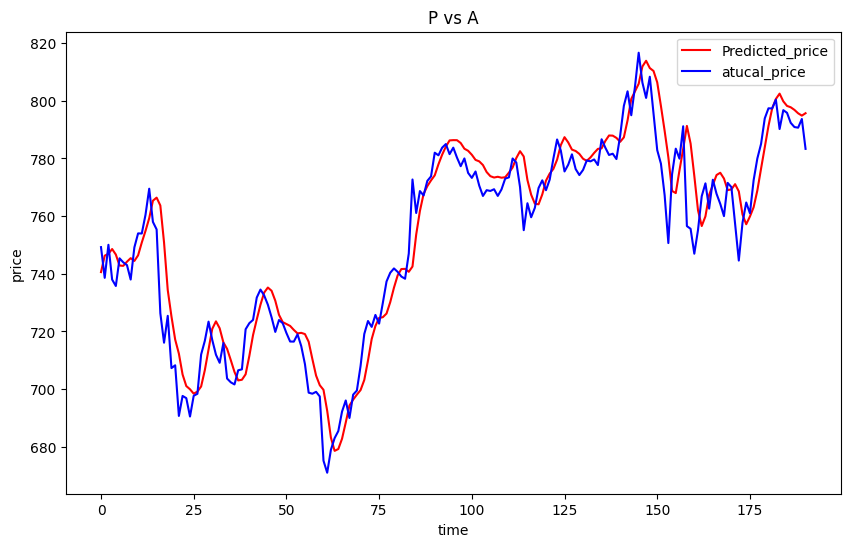

In [52]:
plt.figure(figsize=(10,6))
plt.plot(y_pred.flatten(),label = 'Predicted_price',color = 'red')
plt.plot(y_test.flatten(),label = 'atucal_price',color = 'blue')
plt.title(label='P vs A')
plt.ylabel('price')
plt.xlabel('time')
plt.legend()
plt.show()